# EDA, Feature Engineering and Linear Regression Models 
## (Algerian Forest Fires Dataset)


*GitHub* : https://github.com/raviteja-padala/Machine-Learning-Algorithms

*Dataset*:  https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

*About the Data set*: The data set comprises of the study on Forest fires that occured in two regions of Algeria, namely the 'Bejaia region' and the 'Sidi Bel-abbes region' during the period of june to september in year 2012. In this dataset we have data observations of 'Meteorological conditions' and 'Fire Weather Index(FWI) components' that influence the forest fires. 

**Problem Statement**
To build a model to predict Temperature of region where fire is occuring depending on the all the influential parameters in the dataset.



1. Exploratory Data Analysis and Feature Engineering

* Data Profiling
* Stastical analysis
* Graphical Analysis
* Data Encoding
* Data Scaling

2. Regression Models

* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic-Net Regression
* Performance metrics for above models



In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading forest fire csv Data set as alias ff

ff = pd.read_csv(r'file:///E:\Users\Raviteja\Downloads\Datasets\Algerian_forest_fires_dataset_UPDATE.csv', header=1)


In [3]:
# using head() function to show top 05 rows
ff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
## Removing unnecessary rows from datasets

ff.drop([122,123], inplace = True) 
ff.reset_index(inplace=True)
ff.drop('index',axis=1,inplace=True)

In [5]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
ff.loc[:122,'Region']=0
ff.loc[122:, 'Region']=1

In [6]:
# To check shape of data set i.e., No. of rows and No. of columns in Data set.

ff.shape

(244, 15)

In [7]:
# TO check basic info of data set

ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [8]:
# columns names from data set
ff.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
# here it is visible that some columns have spaces in the names like RH, Ws
# stripping spaces from column names
ff.columns = [fea.strip() for fea in ff.columns]
ff.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
### converting all feature values to string so that we can do data cleaning as shown below.
ff=ff.astype(str)

### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    ff[feature]= ff[feature].str.replace(" ","")

In [11]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [12]:
### index no 165 for feature name FWI has value fire
ff[ff['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [13]:
### replacing fire value witha float value
ff.loc[165,'FWI']=' 0.1'


In [14]:
### replacing nan value with fire to make data equal to the info given in dataset 
ff[ff['Classes']== 'nan'].index
ff.loc[165,'Classes']='fire'

In [15]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 'Region':'float64'}

dataset = ff.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

In [16]:
### checking for null values

dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
dataset.shape

(244, 15)

In [18]:
#checking column classes

ff['Classes'].value_counts()

fire       138
notfire    106
Name: Classes, dtype: int64

In [19]:
### Getting uniques values in each features

ff.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            126
Classes          2
Region           2
dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

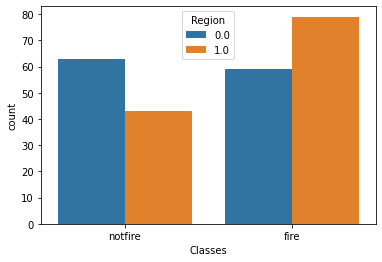

In [20]:
# FInding fire and not fire scenarios based on region
sns.countplot(data=dataset, x='Classes', hue='Region')

**Observation:**

As the feature Region has 0 for Bejaia region and 1 for Sidi Bel-abbes region, It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.


<AxesSubplot:title={'center':'Count of Temparature Readings at specific months'}, xlabel='month', ylabel='count'>

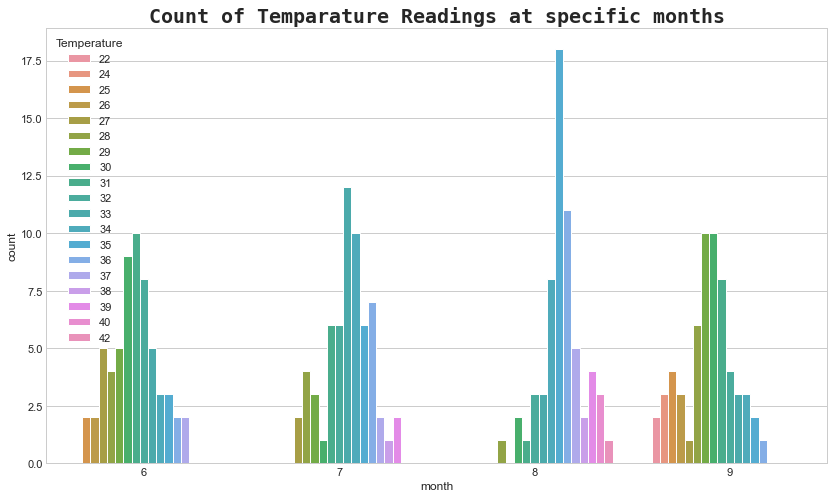

In [101]:
# FInding fire and not fire scenarios based on region
plt.title('Count of Temparature Readings at specific months', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
sns.countplot(data=dataset, x='month', hue='Temperature')

**Observation:**

8th month recorded higher temparature counts compared to other three months.

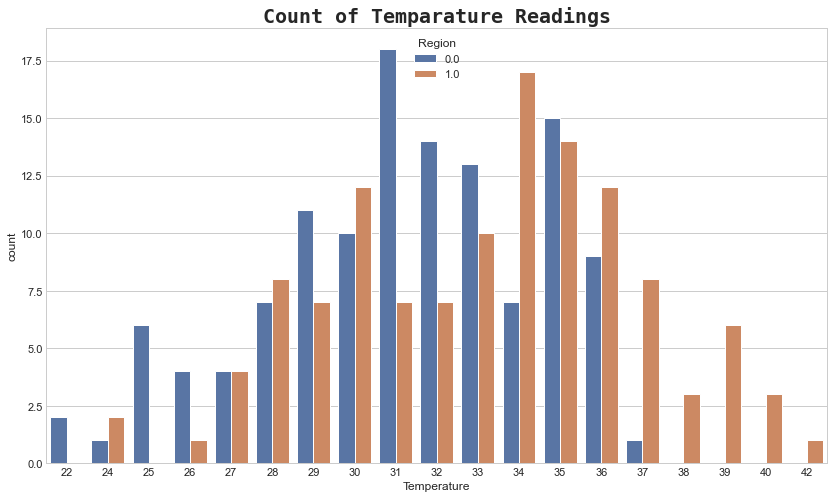

In [102]:
# FInding Temparature readings based on region
sns.countplot(data=dataset, x='Temperature', hue='Region')
plt.title('Count of Temparature Readings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

**Observation:**

Region 1, which is 'Sidi Bel-abbes' region recorded Higher temparature readings.

In [23]:
### Getting list of numerical features (num_fea)
num_fea = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(num_fea)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [24]:
#statistical data of numerical features

ff_num = dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
ff_num.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
ff_num.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


In [26]:
#Extracting features that can impact our dependent variable that is temparature

ff_indep = dataset[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
ff_indep.describe()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967,0.500000
std,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505,0.501028
min,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


<AxesSubplot:>

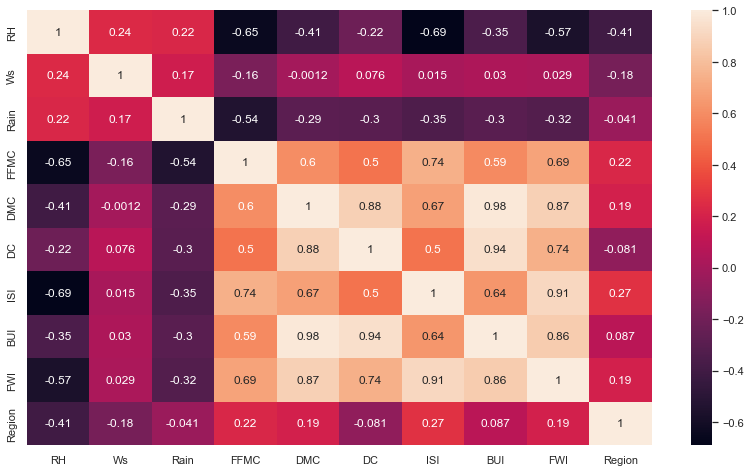

In [27]:

#finding the correlation between the variables in the dataset in the form of a heatmap

sns.set(rc={'figure.figsize':(14,8)})


sns.heatmap(ff_indep.corr(),  annot = True)


####  DEPENDENT AND INDEPENDENT fEATURES:

Independent variables are the input for a process that is being analyzes. Dependent variables are the output of the process. These variable does not depend on other variables.
Dependent variables are mostly the output of the process. And these are dependent on other variables.

In [28]:
#Temparature is dependent feature stored in y, remaining are independent features stored in x

## Independent And Dependent Features

x = dataset[['day', 'month', 'year', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
y= ff_num['Temperature']

In [29]:
x.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [30]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

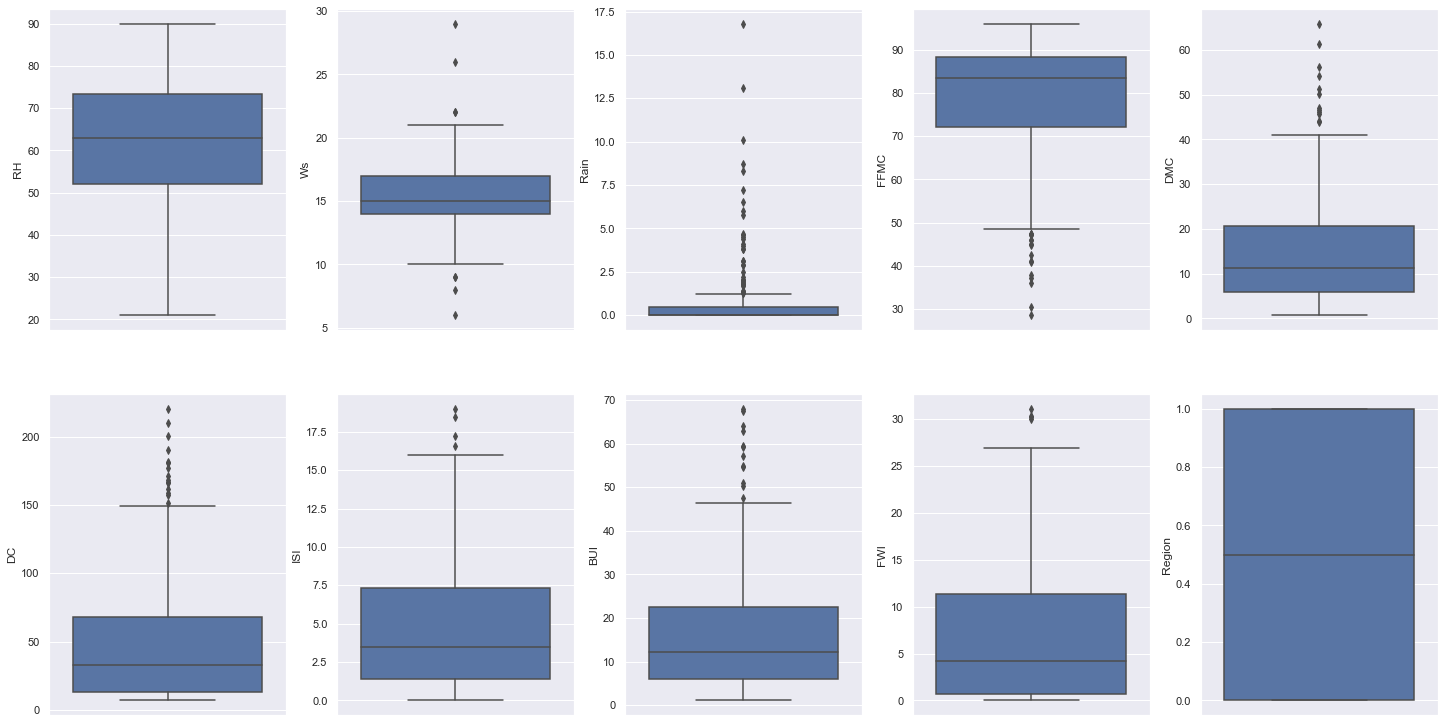

In [31]:
# Finding Outliers

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in ff_indep.items():
    sns.boxplot(y=k, data= ff_indep, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()


*** Observation: ***

Wind speed, Rain, FMCC, DMC, DC , ISI, BUI, FWI features have outliers.

In [32]:
# VALUE COUNTS OF TEMPARATURE READINGS

temp = ff_num['Temperature'].value_counts()
temp.sort_values(ascending= True)

42     1
22     2
40     3
38     3
24     3
26     5
39     6
25     6
27     8
37     9
28    15
29    18
36    21
32    21
30    22
33    23
34    24
31    25
35    29
Name: Temperature, dtype: int64

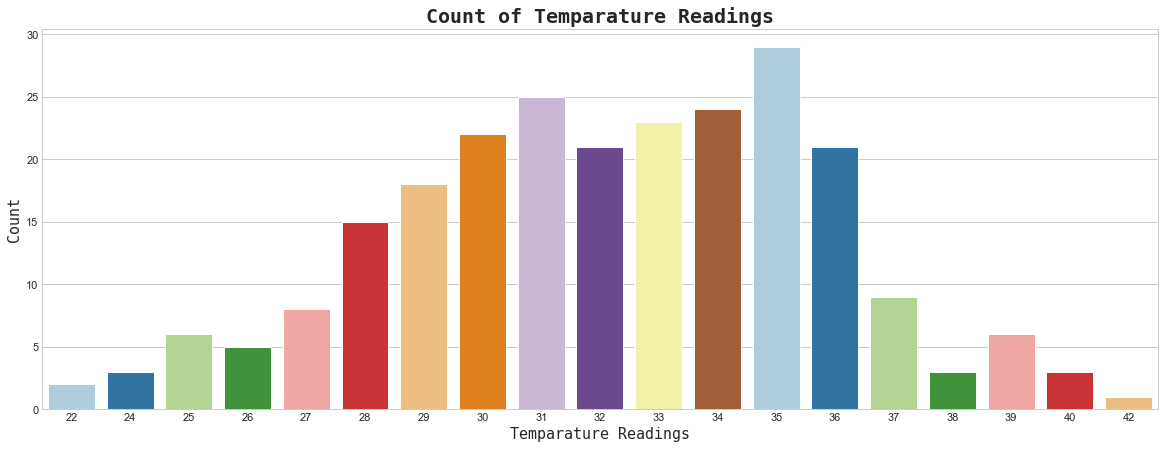

In [33]:
temp = ff_num['Temperature'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(temp.index, temp.values, palette = 'Paired')

plt.title('Count of Temparature Readings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Temparature Readings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.show()

*** Observation: ***

Temparature readings 28 to 36 are recorded more number of times.

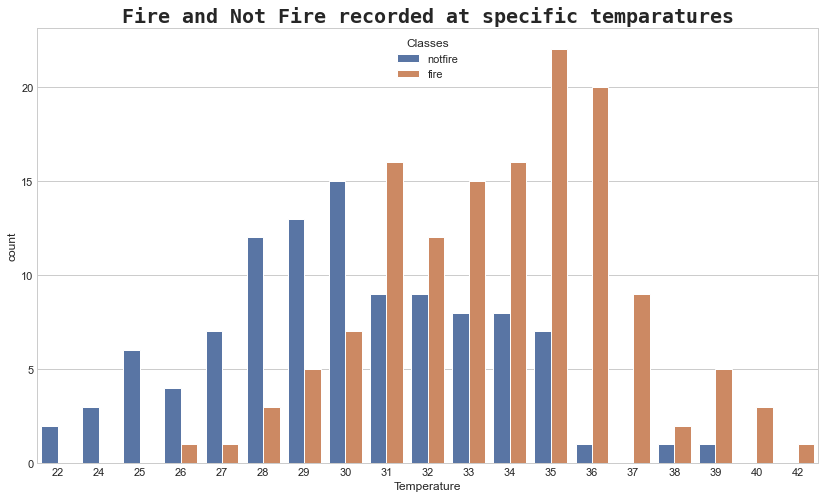

In [34]:
# Reading FIre and Not fire scenarios at specific temparatures

sns.countplot(data= dataset, x='Temperature', hue='Classes')
plt.title('Fire and Not Fire recorded at specific temparatures', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

*** Observation: ***

FIre scenarios are high at 34, 35, 36 temparature readings.

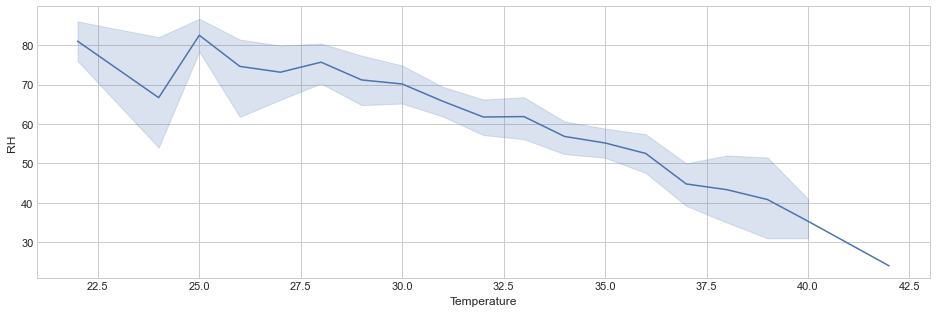

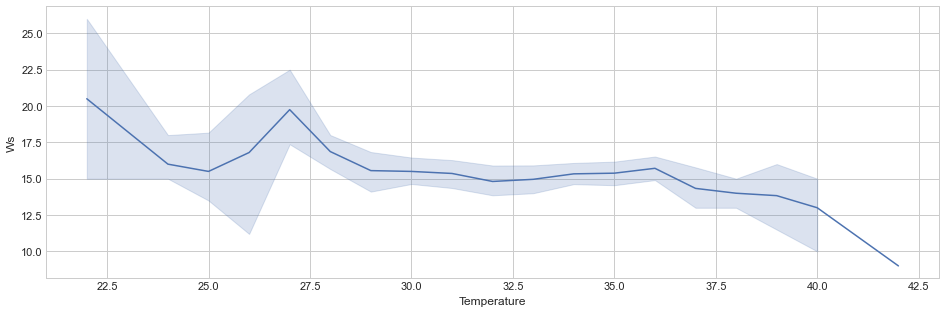

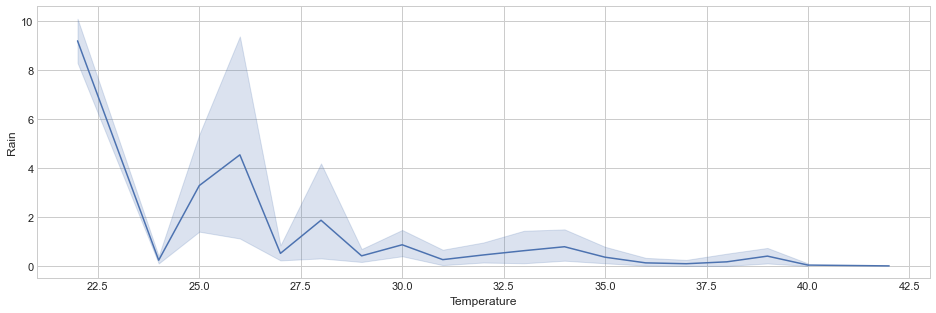

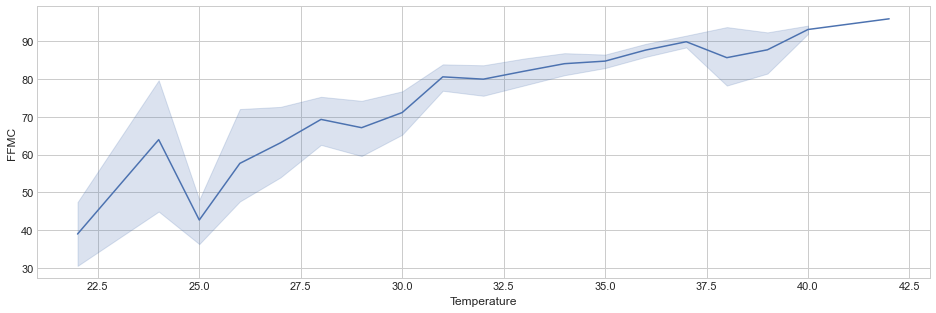

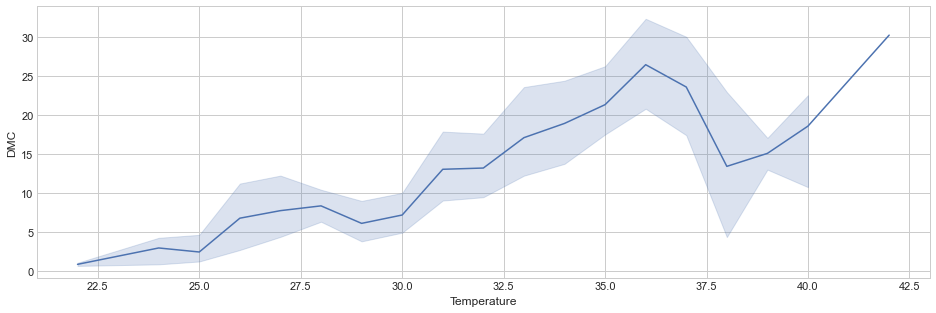

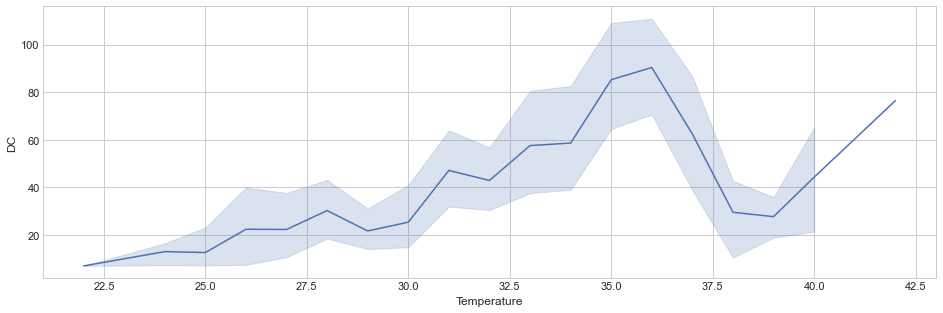

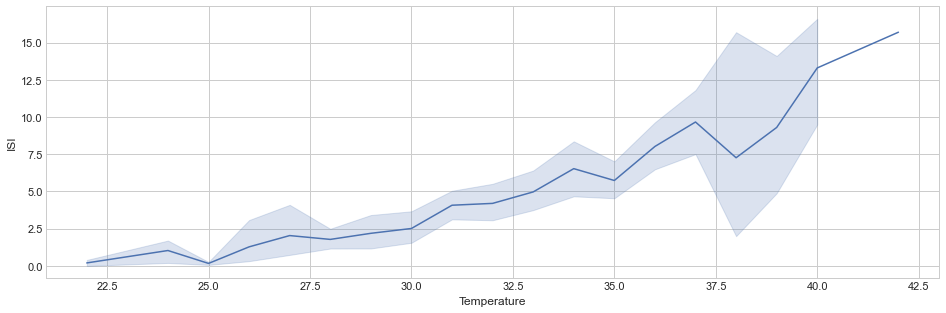

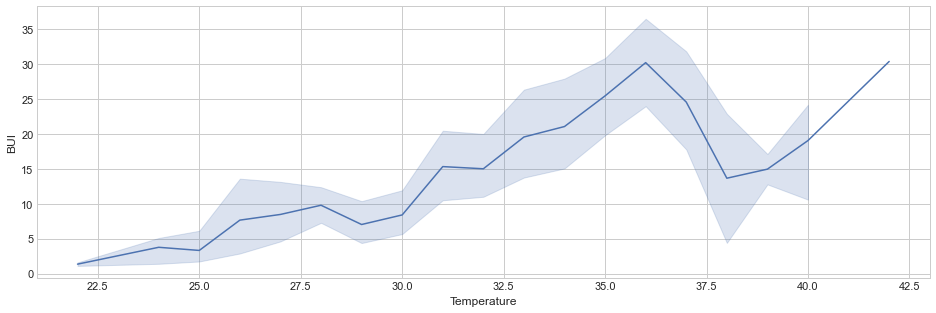

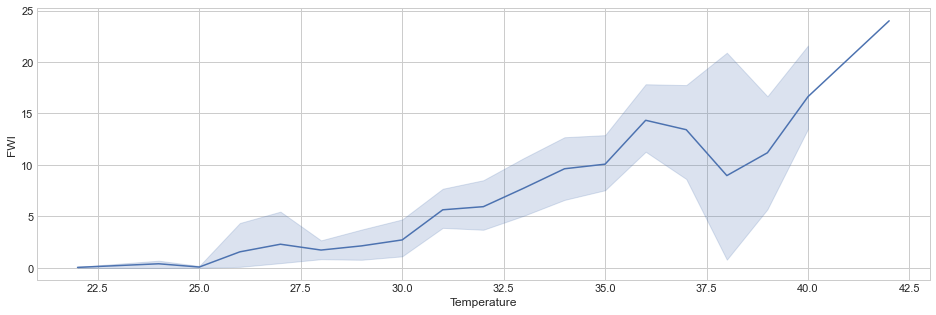

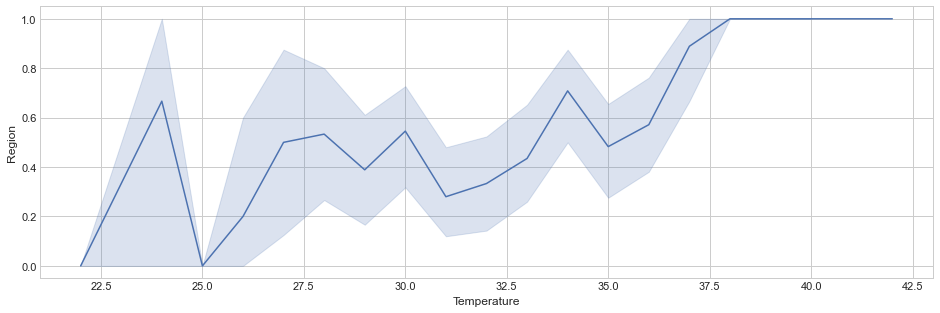

In [35]:
# Finding Relation between Temparature and other variables.

for i in ff_indep:
    plt.subplots(figsize=(16,5))
    sns.lineplot(x= dataset.Temperature, y= ff_indep[i],color='b')
    plt.show()


*** Observation: ***

RH, Ws, Rain are inversely related to Tempereture while FFMC, DMC, DC, ISI, BUI, FWI indicates higher temperature redings.

###  DEPENDENT AND INDEPENDENT fEATURES:

* Independent variables are the input for a process that is being analyzed. And these features are not dependent on other features

* Dependent variables are mostly the output of the process. And these are dependent on other variables.

In [36]:
#Temparature is dependent feature stored in y, remaining are independent features stored in x

## Independent And Dependent Features

x = dataset[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
y= ff_num['Temperature']

In [37]:
# Independent variables
x.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [38]:
# Dependent variable
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

 ### Splitting data into Training and Test data

In [39]:
from sklearn.model_selection import train_test_split

#Train - Test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=10)

In [40]:
print(x_train.shape)
print(y_train.shape)

(163, 10)
(163,)


In [41]:
print(x_test.shape)
print(y_test.shape)

(81, 10)
(81,)


## Standardize or feature scaling the datasets

Standardization entails scaling data to fit a standard normal distribution. A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1. 

In [42]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [43]:
### Using fit_transform to standardise Train data
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32535487,
        -0.8560376 ,  0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76565444,
         1.21985155, -1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35302912,
         0.49262924, -1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08727045,
         0.38685145,  0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76595478,
        -0.77670425,  0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27639932,
        -0.78992648, -1.01857744]])

In [44]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
x_test=scaler.transform(x_test)
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21344278e-01,
        -7.33442383e-01, -6.82030988e-01, -8.03148703e-01,
         9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03375301e+00,
         4.94418103e-01,  1.72378441e+00,  1.16696265e+00,
        -1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06670504e-01,
        -6.38991577e-01, -8.28897625e-01, -7.89926479e-01,
        -1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10863011e-01,
        -7.09829682e-01, -7.72948430e-01, -8.03148703e-01,
        -1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74376141e-01,
         5.18030804e-01,  9.42640966e-02,  4.00073670e-01,
        -1.

## Model Building
### 1. Linear Regression

Linear regression, also known as ordinary least squares (OLS) and linear least squares. We Use linear regression to understand the mean change in a dependent variable given a one-unit change in each independent variable. 

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regression=LinearRegression()
regression

LinearRegression()

In [47]:
#training the Train-data
regression.fit(x_train,y_train)

LinearRegression()

In [48]:
## print the coefficients 

print(regression.coef_)

[-1.17175972 -0.53881745 -0.24025941  0.98114814 -0.15500362  0.82768963
  0.45411292 -0.14087278 -0.30611409  0.27045286]


In [49]:
# Putting together the coefficient and their corresponding variable names
reg_coefficient = pd.DataFrame()
reg_coefficient["Columns"] = x.columns

reg_coefficient['Coefficient Estimate'] = pd.Series(regression.coef_)
print(reg_coefficient)

  Columns  Coefficient Estimate
0      RH             -1.171760
1      Ws             -0.538817
2    Rain             -0.240259
3    FFMC              0.981148
4     DMC             -0.155004
5      DC              0.827690
6     ISI              0.454113
7     BUI             -0.140873
8     FWI             -0.306114
9  Region              0.270453


In [50]:
## print the intercept

print(regression.intercept_)

32.17791411042945


## 1.1 Using model to get predictions of test data

In [51]:
## PRediction for the test data
reg_pred=regression.predict(x_test)
reg_pred

array([31.83897007, 33.25089069, 33.17933435, 31.53611943, 32.80034   ,
       34.71514992, 33.74285467, 34.35769957, 31.82083135, 32.79143221,
       33.70858659, 27.63096292, 35.3177219 , 29.62962493, 31.872802  ,
       32.08947436, 34.14024984, 27.98002609, 36.12448401, 34.25898845,
       32.59347334, 34.54730453, 33.45975363, 32.96144848, 36.04697297,
       29.17819058, 32.33065143, 32.73020381, 27.52573676, 32.24623804,
       25.91928154, 27.28373397, 33.75136648, 32.07094479, 32.81069336,
       30.94541305, 28.94233021, 32.70728263, 27.649484  , 35.29528592,
       32.66857356, 34.04220245, 34.01050883, 31.53904426, 36.46468548,
       33.87097821, 24.40869272, 35.06071599, 33.84872469, 29.59328718,
       31.09317685, 32.29545957, 35.63035362, 31.95262811, 30.21214847,
       30.22852302, 32.85726317, 36.02113599, 31.48789487, 33.71144287,
       32.24081173, 32.73012908, 30.84500327, 24.36691828, 31.48737362,
       36.36309809, 29.90687868, 30.02153743, 34.94708253, 33.66

 ## Validating model using assumptions of Linear regression
 
### 1.2.1 Linear relationship

Test truth data and Predicted data should follow linear relationship.

This is an indication of a good model.

Text(0, 0.5, 'Test Predicted Data')

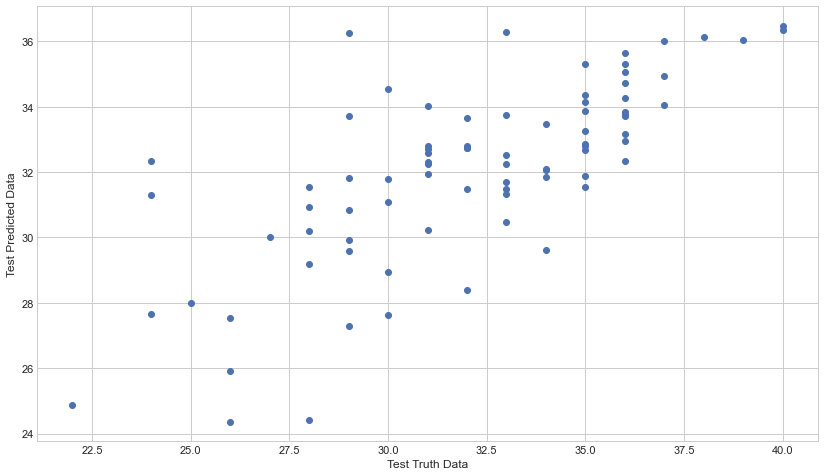

In [52]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

## 1.2.2 Residual distribution

Residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

Residuals should follow normal distribution.

If residuals follow normal distribution, it indicates we have a good model.



In [53]:
## residuals
residuals=y_test-reg_pred
residuals

162    2.161030
60     1.749109
61     2.820666
63     3.463881
69     2.199660
         ...   
169    0.467998
232   -7.244754
144    1.313130
208   -3.287461
105   -2.873083
Name: Temperature, Length: 81, dtype: float64

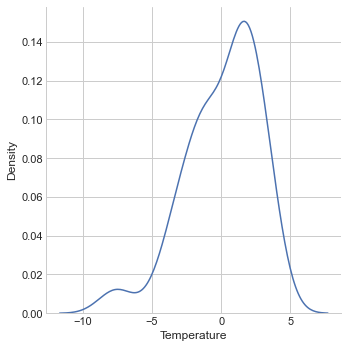

In [54]:
sns.displot(residuals,kind="kde")

## 1.2.3 Uniform distribution

Residuals vs Predictions should follow a uniform distribution.

If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

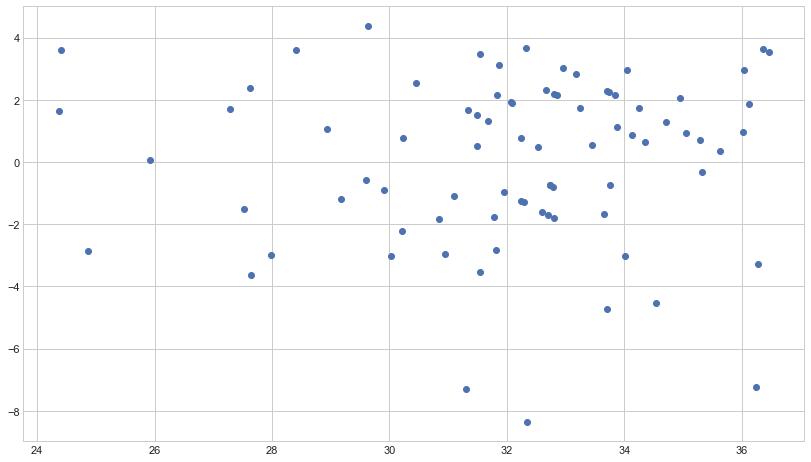

In [55]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

## 1.3 Performance Matrix

1.3.1 Cost function values


### MSE, MAE and RMSE

In [56]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [57]:
print("Mean squared error is {}".format(mean_squared_error(y_test,reg_pred)))
print("Mean absolute error is {}".format(mean_absolute_error(y_test,reg_pred)))
print("Root Mean squared error is {}".format(np.sqrt(mean_squared_error(y_test,reg_pred))))

Mean squared error is 7.0714974672779
Mean absolute error is 2.1777351477944893
Root Mean squared error is 2.659228735418956


## R square and adjusted R square

R-squared measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model. Adjusted R-squared adjusts the statistic based on the number of independent variables in the model.

In [58]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)
print("Our Linear regression model has {} % accuracy".format(round(score*100,3)))

0.5323822806062377
Our Linear regression model has 53.238 % accuracy


In [59]:
## Adjusted R square
#display adjusted R-squared
linear_reg_adj_r2_score= 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(linear_reg_adj_r2_score)

print("Adjusted R square accuracy is {} percent".format(round(linear_reg_adj_r2_score*100,2)))

0.4655797492642717
Adjusted R square accuracy is 46.56 percent


## Model Building
### 2.0 Ridge Regression

Ridge regression allows us to analyze data even when severe multicollinearity is present and helps prevent overfitting. This type of model reduces the large, problematic variance that multicollinearity causes by introducing a slight bias in the estimates. 

In [60]:
## Ridge
from sklearn.linear_model import Ridge


## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [61]:
### Passing training data(X and y) to the model


ridge_reg.fit(x_train,y_train)

Ridge()

In [62]:
### Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))

print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [-1.16562875 -0.53692509 -0.24406564  0.97651735 -0.18651437  0.75280839
  0.42301528 -0.05154146 -0.26384732  0.26481891]
2. Intercept of best fit hyper plane is 32.17791411042945


In [63]:
# Putting together the coefficient and their corresponding variable names
reg_coefficient = pd.DataFrame()
reg_coefficient["Columns"] = x.columns

reg_coefficient['Coefficient Estimate'] = pd.Series(ridge_reg.coef_)
print(reg_coefficient)

  Columns  Coefficient Estimate
0      RH             -1.165629
1      Ws             -0.536925
2    Rain             -0.244066
3    FFMC              0.976517
4     DMC             -0.186514
5      DC              0.752808
6     ISI              0.423015
7     BUI             -0.051541
8     FWI             -0.263847
9  Region              0.264819


## 2.1 Using model to get predictions of test data

In [64]:
# Using model to get predictions of test data
ridge_reg_pred = ridge_reg.predict(x_test)
ridge_reg_pred

array([31.83447276, 33.24944539, 33.17622255, 31.5449438 , 32.80039129,
       34.71847166, 33.71508325, 34.27329763, 31.8237669 , 32.79087263,
       33.71791664, 27.64654639, 35.30470874, 29.61643117, 31.86737864,
       32.09744844, 34.1242721 , 28.00338503, 36.13000285, 34.28967364,
       32.58898999, 34.49512187, 33.46481581, 32.96932882, 36.02826422,
       29.19265216, 32.28547882, 32.73753621, 27.54969405, 32.23760514,
       25.93559566, 27.30158581, 33.74517087, 32.06518575, 32.80538561,
       30.93476141, 28.94458772, 32.69503579, 27.67374482, 35.27652776,
       32.65944979, 34.0577673 , 34.01805671, 31.52354034, 36.45492089,
       33.87241637, 24.41235896, 35.05866771, 33.86188366, 29.60230573,
       31.09137728, 32.29833182, 35.65484033, 31.95112803, 30.22517546,
       30.21747328, 32.86527832, 36.04233652, 31.4867    , 33.69423645,
       32.23024715, 32.72244469, 30.85436125, 24.36738578, 31.48550569,
       36.32759778, 29.91722095, 29.99955699, 34.96396777, 33.65

## 2.2 Validating model using assumptions of Ridge regression
### 2.2.1 Linear relationship


Test truth data and Predicted data should follow linear relationship.
This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

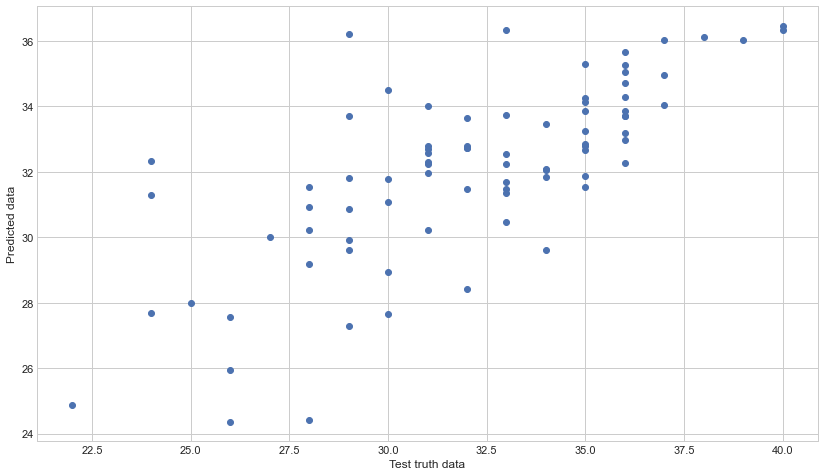

In [65]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### 2.2.2 Residual distribution

Residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

Residuals should follow normal distribution.
If residuals follow normal distribution, it indicates we have a good model.


Residual Equation : 


In [66]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg.head()

162    2.165527
60     1.750555
61     2.823777
63     3.455056
69     2.199609
Name: Temperature, dtype: float64

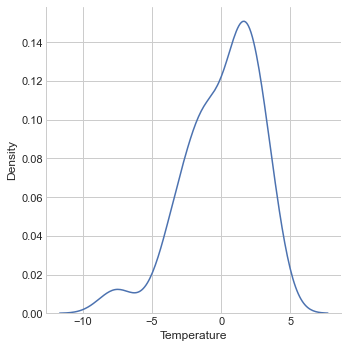

In [67]:
sns.displot(x=residual_ridge_reg, kind='kde')

### 2.2.3 Uniform distribution
Residuals vs Predictions should follow a uniform distribution.
If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

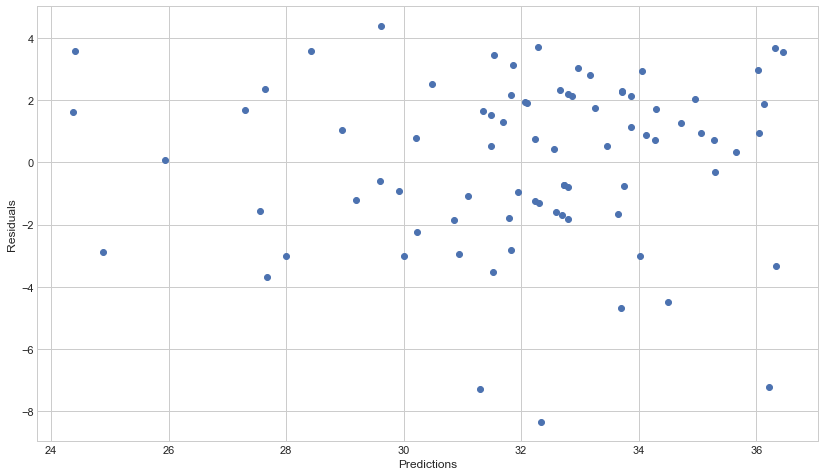

In [68]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### 2.3 Performance Matrix

### MSE, MAE and RMSE

2.3.1 Cost function values

In [69]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean squared error is {}".format(round(mean_squared_error(y_test, ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)))

Mean squared error is 7.07
Mean absolute error is 2.18
Root Mean squared error is 2.66


### 2.3.2 R Square and Adjusted R Square values

In [70]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
print("Our Ridge regression model has {} % accuracy".format(round(ridge_reg_r2_score*100,3)))

ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(ridge_reg_adj_r2_score*100,2)))

Our Ridge regression model has 53.267 % accuracy
Adjusted R square accuracy is 46.59 percent


## Model Building

## 3.0 Lasso Regression

Lasso regression (least absolute shrinkage and selection operator) performs variable selection that aims to increase prediction accuracy by identifying a simpler model. It is similar to Ridge regression but with variable selection.

In [71]:
from sklearn.linear_model import Lasso

In [72]:
## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [73]:
### Passing training data(X and y) to the model
lasso_reg.fit(x_train, y_train)

Lasso()

In [74]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.          0.          0.        ]
2. Intercept of best fit hyper plane is 32.17791411042945


In [75]:
# Putting together the coefficient and their corresponding variable names
reg_coefficient = pd.DataFrame()
reg_coefficient["Columns"] = x.columns

reg_coefficient['Coefficient Estimate'] = pd.Series(lasso_reg.coef_)
print(reg_coefficient)

  Columns  Coefficient Estimate
0      RH             -0.719558
1      Ws             -0.000000
2    Rain             -0.000000
3    FFMC              0.895820
4     DMC              0.000000
5      DC              0.000000
6     ISI              0.000000
7     BUI              0.000000
8     FWI              0.000000
9  Region              0.000000


### 3.1 Using model to get predictions of test data

In [76]:
lasso_reg_pred=lasso_reg.predict(x_test)
lasso_reg_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

## 3.2 Validating model using assumptions of Lasso regression
### 3.2.1 Linear relationship
Test truth data and Predicted data should follow linear relationship.
This is an indication of a good model.


Text(0, 0.5, 'Predicted data')

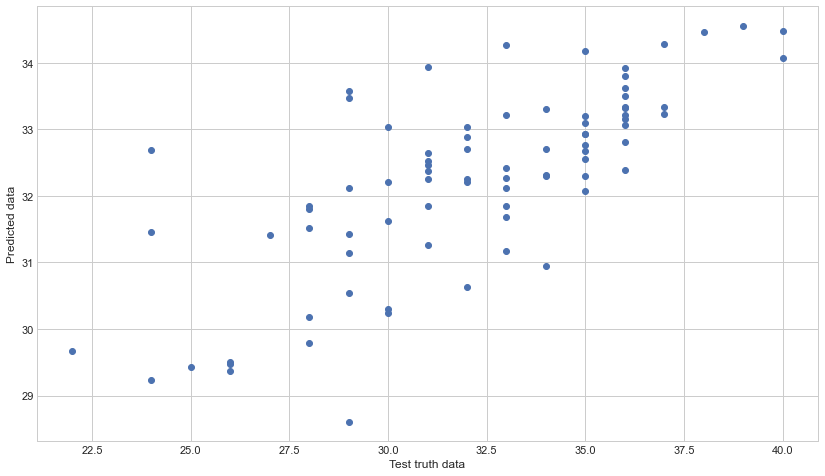

In [77]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### 3.2.2 Residual distribution

Residuals should follow normal distribution.
If residuals follow normal distribution, it indicates we have a good model.

In [78]:
residual_lasso_reg=y_test-lasso_reg_pred
residual_lasso_reg.head()

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
Name: Temperature, dtype: float64

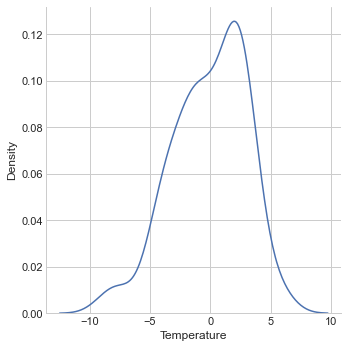

In [79]:
sns.displot(x=residual_lasso_reg, kind='kde')

### 3.2.3 Uniform distribution
Residuals vs Predictions should follow a uniform distribution.
If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

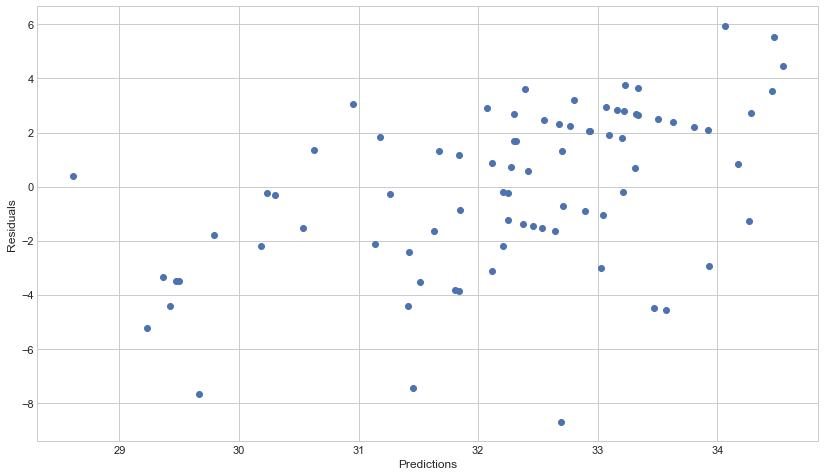

In [80]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## 3.3 Performance Matrix

### 3.3.1 Cost function values
## MSE, MAE and RMSE

In [81]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)))

Mean squared error is 9.11
Mean absolute error is 2.5
Root Mean squared error is 3.02


### 3.3.2 R Square and Adjusted R Square values


In [82]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
print("Our Lasso regression model has {} % accuracy".format(round(lasso_reg_r2_score*100,3)))

lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(lasso_reg_adj_r2_score*100,2)))

Our Lasso regression model has 39.784 % accuracy
Adjusted R square accuracy is 31.18 percent


## Model Building

## 4.0 Elastic-Net Regression

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.


In [83]:
from sklearn.linear_model import ElasticNet

In [84]:

## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [85]:
### Passing training data(X and y) to the model
elastic_reg.fit(x_train, y_train)

ElasticNet()

In [86]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.68412144 -0.107331   -0.01965149  0.70111598  0.08222368  0.
  0.24957174  0.04891239  0.12368505  0.        ]
2. Intercept of best fit hyper plane is 32.17791411042945


In [87]:
# Putting together the coefficient and their corresponding variable names
reg_coefficient = pd.DataFrame()
reg_coefficient["Columns"] = x.columns

reg_coefficient['Coefficient Estimate'] = pd.Series(elastic_reg.coef_)
print(reg_coefficient)

  Columns  Coefficient Estimate
0      RH             -0.684121
1      Ws             -0.107331
2    Rain             -0.019651
3    FFMC              0.701116
4     DMC              0.082224
5      DC              0.000000
6     ISI              0.249572
7     BUI              0.048912
8     FWI              0.123685
9  Region              0.000000


### 4.1 Using model to get predictions of test data

In [88]:
elastic_reg_pred=elastic_reg.predict(x_test)
elastic_reg_pred

array([31.93390194, 32.95580441, 32.70381015, 31.76811437, 32.91092231,
       33.98259945, 33.4976214 , 32.60080178, 31.92937384, 32.65616262,
       33.36766116, 29.89491291, 34.18103876, 30.67466345, 32.62253373,
       32.21272673, 32.78657232, 29.42520976, 35.1526326 , 33.91973121,
       32.35369063, 33.39918776, 33.5110995 , 32.83854241, 35.16662045,
       30.02265027, 32.07629356, 32.55228178, 29.38073734, 32.02699501,
       29.15201686, 28.64534991, 33.20217757, 32.27975552, 32.63103663,
       31.33228495, 30.0435967 , 32.26592442, 29.20155101, 33.98680139,
       32.8233234 , 33.54329056, 34.19543267, 31.53357597, 34.52504238,
       33.3770509 , 29.31101222, 33.92080295, 33.40085397, 30.34898366,
       31.39274873, 32.29462943, 34.68311694, 31.99418558, 31.35114428,
       30.92038385, 32.3750856 , 34.84316141, 31.63582369, 33.43921304,
       32.06909386, 32.40900245, 31.23668085, 28.89023282, 31.89702943,
       34.85778594, 30.85678456, 31.00890899, 33.86670182, 32.88

### 4.2 Validating model using assumptions of Elastic-Net regression

#### 4.2.1 Linear relationship
Test truth data and Predicted data should follow linear relationship.
This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

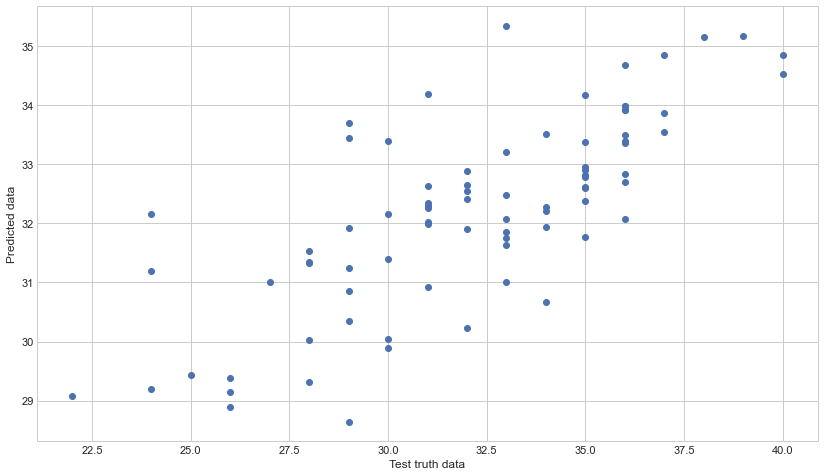

In [89]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### 4.2.2 Residual distribution
Residuals should follow normal distribution.
If residuals follow normal distribution, it indicates we have a good model.

In [90]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg.head()

162    2.066098
60     2.044196
61     3.296190
63     3.231886
69     2.089078
Name: Temperature, dtype: float64

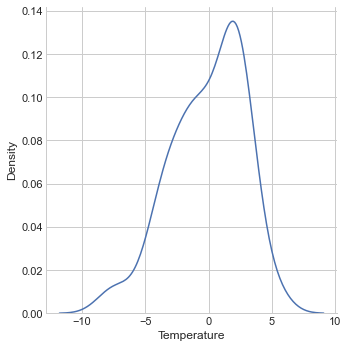

In [91]:
sns.displot(x=residual_elastic_reg, kind='kde')

### 4.2.3 Uniform distribution
Residuals vs Predictions should follow a uniform distribution.
If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

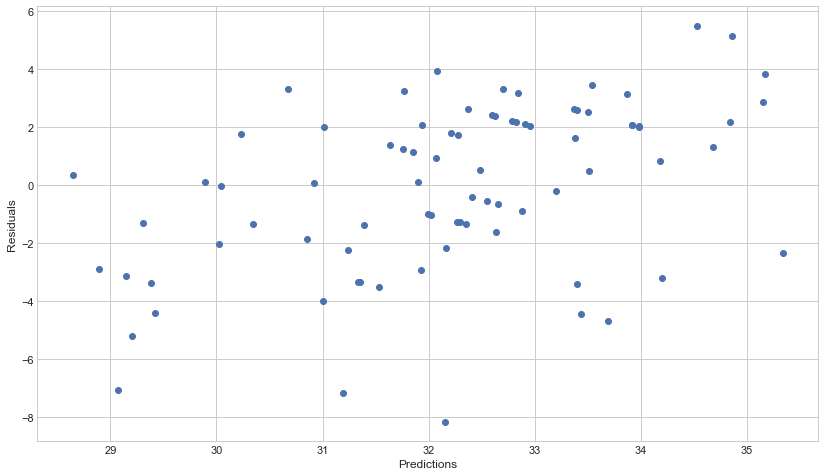

In [92]:
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### 4.3 Performance Matrix
### 4.3.1 Cost function values
### MSE, MAE and RMSE

In [93]:
print("Mean squared error is '{}'".format(round(mean_squared_error(y_test, elastic_reg_pred),2)))
print("Mean absolute error is '{}'".format(round(mean_absolute_error(y_test, elastic_reg_pred),2)))
print("Root Mean squared error is '{}'".format(round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

Mean squared error is '8.31'
Mean absolute error is '2.39'
Root Mean squared error is '2.88'


### 4.3.2 R Square and Adjusted R Square values

In [94]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
print("Our Elastic-Net regression model has {} % accuracy".format(round(elastic_reg_r2_score*100,3)))

elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(elastic_reg_adj_r2_score*100,2)))

Our Elastic-Net regression model has 45.078 % accuracy
Adjusted R square accuracy is 37.23 percent


### 5.0 Comparisions of all Models

## 5.1 MSE (Mean squared error )

Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values.

Mean squared error (MSE) : 

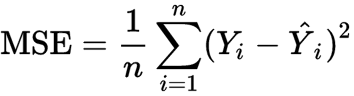

{MSE}	=	mean squared error

{n}	=	number of data points

Y_{i}	=	observed values

\hat{Y}_{i}	=	predicted values

In [95]:
print("MSE for Linear Regression Model is '{}'\nMSE for Ridge Regression Model is '{}'\nMSE for Lasso Regression Model is '{}'\nMSE for Elastic-Net Regression Model is '{}'\n"
      .format(round(mean_squared_error(y_test, reg_pred),2), round(mean_squared_error(y_test, ridge_reg_pred),2),
             round(mean_squared_error(y_test, lasso_reg_pred),2), round(mean_squared_error(y_test, elastic_reg_pred),2)))

MSE for Linear Regression Model is '7.07'
MSE for Ridge Regression Model is '7.07'
MSE for Lasso Regression Model is '9.11'
MSE for Elastic-Net Regression Model is '8.31'



## 5.2 MAE (Mean Absolute Error)

The Mean Absolute Error (MAE) is the sum of the **predicted values (yi)** minus the **true values (xi)** divided by the number of predicted values (n).

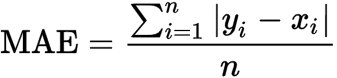



**MAE	=	mean absolute error**

y_i	=	prediction value

x_i	=	true value

n	=	total number of data points


In [96]:
print("MAE for Linear Regression Model is '{}'\nMAE for Ridge Regression Model is '{}'\nMAE for Lasso Regression Model is '{}'\nMAE for Elastic-Net Regression Model is '{}'\n"
      .format(round(mean_absolute_error(y_test, reg_pred),2), round(mean_absolute_error(y_test, ridge_reg_pred),2),
             round(mean_absolute_error(y_test, lasso_reg_pred),2), round(mean_absolute_error(y_test, elastic_reg_pred),2)))

MAE for Linear Regression Model is '2.18'
MAE for Ridge Regression Model is '2.18'
MAE for Lasso Regression Model is '2.5'
MAE for Elastic-Net Regression Model is '2.39'



## 5.3 RMSE (Root Mean squared Error)

Root Mean square is the standard deviation of the residuals. RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.
RMSE is used to measure distance between predicted and actual values.
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable.

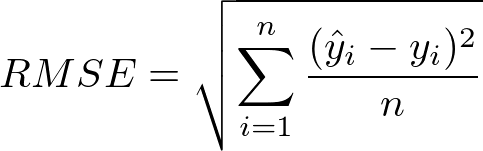

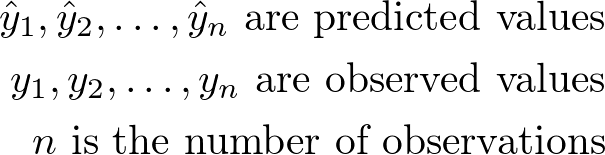

In [97]:
print("RMSE for Linear Regression Model is '{}'\nRMSE for Ridge Regression Model is '{}'\nRMSE for Lasso Regression Model is '{}'\nRMSE for Elastic-Net Regression Model is '{}'\n"
      .format(round(np.sqrt(mean_squared_error(y_test, reg_pred)),2), round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2),
             round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2), round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

RMSE for Linear Regression Model is '2.66'
RMSE for Ridge Regression Model is '2.66'
RMSE for Lasso Regression Model is '3.02'
RMSE for Elastic-Net Regression Model is '2.88'



## 5.4 R Square values

R-squared (aka coefficient of determination) measures the variation that is explained by a regression model

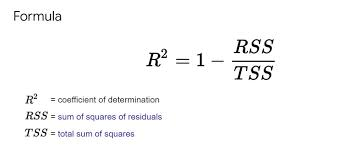

In [98]:
print("Accuracy of Linear Regression Model is '{}'\nAccuracy of Ridge Regression Model is '{}'\nAccuracy of Lasso Regression Model is '{}'\nAccuracy of Elastic-Net Regression Model is '{}'\n".format(
round(score*100,3), round(ridge_reg_r2_score*100,3), round(lasso_reg_r2_score*100,3), round(elastic_reg_r2_score*100,3)))

Accuracy of Linear Regression Model is '53.238'
Accuracy of Ridge Regression Model is '53.267'
Accuracy of Lasso Regression Model is '39.784'
Accuracy of Elastic-Net Regression Model is '45.078'



## 5.5 Adjusted R Square values

The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.

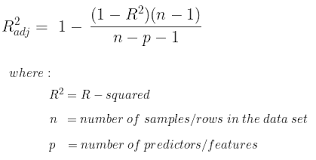

In [99]:
print("Adjusted R Square accuracy for Linear Regression Model is '{}'\nAdjusted R Square accuracy for Ridge Regression Model is '{}'\nAdjusted R Square accuracy for Lasso Regression Model is '{}'\nAdjusted R Square accuracy for Elastic-Net Regression Model is '{}'\n".format(
round(linear_reg_adj_r2_score*100,3), round(ridge_reg_adj_r2_score*100,3), round(ridge_reg_adj_r2_score*100,3), round(elastic_reg_adj_r2_score*100,3)))

Adjusted R Square accuracy for Linear Regression Model is '46.558'
Adjusted R Square accuracy for Ridge Regression Model is '46.591'
Adjusted R Square accuracy for Lasso Regression Model is '46.591'
Adjusted R Square accuracy for Elastic-Net Regression Model is '37.232'

